In [26]:
import numpy as np
import pandas as pd
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import xgboost
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import lightgbm as lgb
from time import time
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv("./Desktop/nlp_a1/train.csv")

In [4]:
data.count()

profile       127855
profession    127855
dtype: int64

<AxesSubplot:>

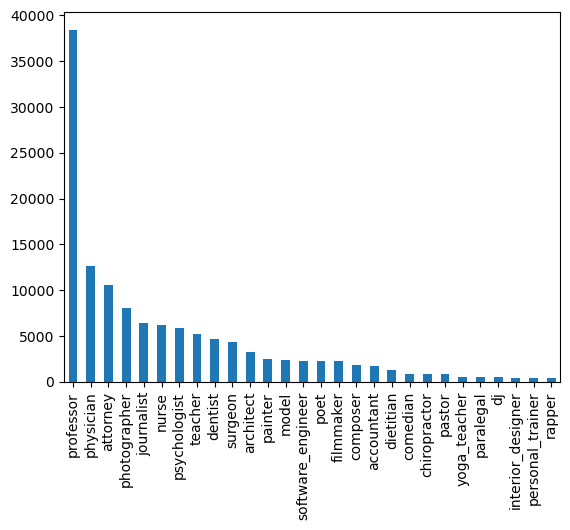

In [5]:
data['profession'].value_counts().plot(kind='bar')

In [6]:
data['profile'].apply(lambda x: len(x.split(' '))).sum()

7724382

In [ ]:
# data['profession'] = data['profession'].apply(BeautifulSoup("lxml"))
# text = BeautifulSoup(text, "lxml").text
# for i in data.index:
#     data['profession'][i] = BeautifulSoup(data['profession'][i], "lxml")

In [3]:
punctuation = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
Stopwords = set(stopwords.words('english'))

In [4]:
def preprocess(txt):
#     txt = BeautifulSoup(txt, "lxml").text
    txt = txt.lower() 
    txt = punctuation.sub(' ', txt)
    text = BAD_SYMBOLS_RE.sub('', txt) 
    txt = ' '.join(word for word in txt.split() if word not in Stopwords) # delete stopwors from text
    return txt

In [5]:
data['profile']=data['profile'].apply(preprocess)

In [10]:
data['profile'].apply(lambda x: len(x.split(' '))).sum()

4840071

In [ ]:
labels = data['profession'].unique()
y2id,id2y={},{}
for i,j in enumerate(labels):
    y2id[j]=i
    id2y[i]=j
    
data1=data.replace({'profession':y2id})

In [ ]:
X = data1.profile
y = data1.profession

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)

In [ ]:
# Naive Bayes Classifier for Multinomial Models

from sklearn.naive_bayes import MultinomialNB

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
my_tags=data['profession'].unique().tolist()
# %%time

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

In [ ]:
# Stocastic Gradient Classifier

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

# %%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

In [ ]:
# Logistic Regression
a= time()
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)
b=time()
print(b-a)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

In [20]:
# XG Boost Classifier

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

xgb = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', XGBClassifier()),
               ])
xgb.fit(X_train, y_train)

# %%time

y_pred = xgb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7921473544249344


NameError: name 'classification_report' is not defined

In [ ]:
%pip install wget

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"